O dataset utilizado foi obtido em https://www.kaggle.com/uciml/pima-indians-diabetes-database/data. Refere-se a um famoso estudo com duração de 5 anos, envolvendo mulheres da tribo indigina norte-americana Prima, situada no estado do Arizona. Este estudo foi realizado para identificar a ocorrência de diabetes hereditaria.

Parametros:
1. Numero de vezes grávida;
2. Concentração plasmática de glicose, colido sistematicamente as 14h, com um teste oral de tolerância à glicose
3. Pressão arterial diastólica (mm Hg)
4. Espessura da dobra da pele do tríceps (mm)
5. Insulina sérica as 14 horas (mu U / ml)
6. IMC
7. Função pedigree da diabetes;
8. Idade (anos);
9. Possui diabetes 1, não possue 0;

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from keras.models import Sequential
from keras.layers import Dense
from keras import optimizers
from sklearn.model_selection import train_test_split

Using TensorFlow backend.


In [2]:
np.random.seed(7)

### Carregando os dados

In [3]:
dataset = np.loadtxt("diabetes.csv", delimiter=",")
xdataset = dataset[:, 0:8]
ydataset = dataset[:, 8]


## Aplicando scaler pra normalizar dados (Opcional, melhora a precissão)

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_scaler = scaler.fit_transform(xdataset)

## Crianda dataframe para ajudar no tratamento dos dados

In [5]:
labels = ['gravida',
         'glicose plamática',
         'perssão arterial diastólica',
         'dobra da pele tríceps',
         'indulina sérica',
         'IMC',
         'Função pedigree',
         'Idade']
df_diabetes = pd.DataFrame(X_scaler,columns=labels)
df_diabetes

gravida  glicose plamática  perssão arterial diastólica  \
0    0.639947           0.848324                     0.149641   
1   -0.844885          -1.123396                    -0.160546   
2    1.233880           1.943724                    -0.263941   
3   -0.844885          -0.998208                    -0.160546   
4   -1.141852           0.504055                    -1.504687   
5    0.342981          -0.153185                     0.253036   
6   -0.250952          -1.342476                    -0.987710   
7    1.827813          -0.184482                    -3.572597   
8   -0.547919           2.381884                     0.046245   
9    1.233880           0.128489                     1.390387   
10   0.046014          -0.340968                     1.183596   
11   1.827813           1.474267                     0.253036   
12   1.827813           0.566649                     0.563223   
13  -0.844885           2.131507                    -0.470732   
14   0.342981           1.411672                     0.149641   
15   0.936914          -0.653939                    -3.572597   
16  -1.141852          -0.090591                     0.770014   
17   0.936914          -0.434859                     0.253036   
18  -0.844885          -0.560048                    -2.021665   
19  -0.844885          -0.184482                     0.046245   
20  -0.250952           0.159787                     0.976805   
21   1.233880          -0.685236                     0.770014   
22   0.936914           2.350587                     1.080200   
23   1.530847          -0.059293                     0.563223   
24   2.124780           0.691838                     1.286991   
25   1.827813           0.128489                     0.046245   
26   0.936914           0.817027                     0.356432   
27  -0.844885          -0.747831                    -0.160546   
28   2.718712           0.754432                     0.666618   
29   0.342981          -0.121888                     1.183596   
..        ...                ...                          ...   
738 -0.547919          -0.685236                    -0.470732   
739 -0.844885          -0.591345                     0.253036   
740  2.124780          -0.027996                     0.563223   
741 -0.250952          -0.591345                    -1.297896   
742 -0.844885          -0.372265                    -0.574128   
743  1.530847           0.597947                     1.286991   
744  2.718712           1.004810                     0.976805   
745  2.421746          -0.653939                     0.770014   
746 -0.844885           0.817027                     1.286991   
747 -0.844885          -1.248585                     0.253036   
748 -0.250952           2.068912                     0.046245   
749  0.639947           1.286484                    -0.367337   
750  0.046014           0.472758                     0.046245   
751 -0.844885           0.003301                     0.459827   
752 -0.250952          -0.403562                    -0.367337   
753 -1.141852           1.881130                     0.976805   
754  1.233880           1.036107                     0.459827   
755 -0.844885           0.222381                     0.976805   
756  0.936914           0.504055                     1.080200   
757 -1.141852           0.065895                     0.149641   
758 -0.844885          -0.466156                     0.356432   
759  0.639947           2.162804                     1.183596   
760 -0.547919          -1.029505                    -0.574128   
761  1.530847           1.536861                     0.253036   
762  1.530847          -0.998208                    -0.367337   
763  1.827813          -0.622642                     0.356432   
764 -0.547919           0.034598                     0.046245   
765  0.342981           0.003301                     0.149641   
766 -0.844885           0.159787                    -0.470732   
767 -0.844885          -0.873019         

In [6]:
df_target = pd.DataFrame(ydataset,columns=['Diabetes'])
df_target

Diabetes
0         1.0
1         0.0
2         1.0
3         0.0
4         1.0
5         0.0
6         1.0
7         0.0
8         1.0
9         1.0
10        0.0
11        1.0
12        0.0
13        1.0
14        1.0
15        1.0
16        1.0
17        1.0
18        0.0
19        1.0
20        0.0
21        0.0
22        1.0
23        1.0
24        1.0
25        1.0
26        1.0
27        0.0
28        0.0
29        0.0
..        ...
738       0.0
739       1.0
740       1.0
741       0.0
742       0.0
743       1.0
744       0.0
745       0.0
746       1.0
747       0.0
748       1.0
749       1.0
750       1.0
751       0.0
752       0.0
753       1.0
754       1.0
755       1.0
756       0.0
757       1.0
758       0.0
759       1.0
760       0.0
761       1.0
762       0.0
763       0.0
764       0.0
765       0.0
766       1.0
767       0.0

[768 rows x 1 columns]

## Separando dados pra treino e teste

In [7]:
xTreino, xTeste, yTreino, yTeste = train_test_split(df_diabetes, np.ravel(df_target), test_size=0.15, random_state=101)

# Definindo o modelo
* 8 entradas
* Camadas "Fully connected"
* 12 , (6,5) , 1 neuronios por camada
* Funções de transferência tanh, tanh, sigmoid

In [8]:
model = Sequential()
# relu, sigmoid, tanh
model.add(Dense(12,use_bias=True, input_dim=8, activation='tanh'))
model.add(Dense(5, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))

## Otimizando o modelo, escolhemos o Adam

In [9]:
sgd = optimizers.SGD(lr=0.1, decay=1e-6, momentum=0.9, nesterov=True)
RMSprop = optimizers.RMSprop(lr=0.001, rho=0.9, epsilon=0.3, decay=0.0)
Adagrad = optimizers.Adagrad(lr=0.01, epsilon=None, decay=0.0)
Adadelta = optimizers.Adadelta(lr=1.0, rho=0.95, epsilon=None, decay=0.0)
Adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0, amsgrad=False)
Adamax = optimizers.Adamax(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, decay=0.0)
Nadam = optimizers.Nadam(lr=0.002, beta_1=0.9, beta_2=0.999, epsilon=None, schedule_decay=0.004)


## compilando o modelo 

In [10]:
model.compile(loss='binary_crossentropy', optimizer=Adamax, metrics=['accuracy'])

In [11]:
history = model.fit(xTreino, yTreino, epochs=100,validation_split=0.15, shuffle=True)

Train on 554 samples, validate on 98 samples
Epoch 1/100
554/554 [==============================] - 0s 421us/step - loss: 0.6951 - acc: 0.5217 - val_loss: 0.6748 - val_acc: 0.5918
Epoch 2/100
554/554 [==============================] - 0s 56us/step - loss: 0.6604 - acc: 0.6318 - val_loss: 0.6492 - val_acc: 0.6531
Epoch 3/100
554/554 [==============================] - 0s 71us/step - loss: 0.6373 - acc: 0.6859 - val_loss: 0.6278 - val_acc: 0.6837
Epoch 4/100
554/554 [==============================] - 0s 50us/step - loss: 0.6180 - acc: 0.6986 - val_loss: 0.6105 - val_acc: 0.6939
Epoch 5/100
554/554 [==============================] - 0s 67us/step - loss: 0.6015 - acc: 0.7220 - val_loss: 0.5957 - val_acc: 0.7041
Epoch 6/100
554/554 [==============================] - 0s 61us/step - loss: 0.5870 - acc: 0.7292 - val_loss: 0.5827 - val_acc: 0.6939
Epoch 7/100
554/554 [==============================] - 0s 56us/step - loss: 0.5749 - acc: 0.7329 - val_loss: 0.5704 - val_acc: 0.6837
Epoch 8/100
554/

## Avaliando o modelo

In [12]:
scores = history.model.evaluate(xTreino, yTreino)
print("\n%s: %.2f%%" % (history.model.metrics_names[1], scores[1]*100))
print("\n%s: %.2f%%" % (history.model.metrics_names[0], scores[0]*100))

652/652 [==============================] - 0s 32us/step

acc: 79.45%

loss: 45.10%


## Predizendo

In [13]:
predictions = history.model.predict(xTeste)
predictions

array([[ 0.32666197],
       [ 0.89043999],
       [ 0.16231731],
       [ 0.39068854],
       [ 0.08279128],
       [ 0.86081743],
       [ 0.79325271],
       [ 0.06687077],
       [ 0.24931334],
       [ 0.30869204],
       [ 0.05209804],
       [ 0.10746451],
       [ 0.16848038],
       [ 0.60417843],
       [ 0.26264957],
       [ 0.84973246],
       [ 0.74796146],
       [ 0.07632247],
       [ 0.39773321],
       [ 0.05195878],
       [ 0.17641057],
       [ 0.5213415 ],
       [ 0.55379021],
       [ 0.35601586],
       [ 0.11081431],
       [ 0.90838367],
       [ 0.06954244],
       [ 0.70232308],
       [ 0.04670965],
       [ 0.58664078],
       [ 0.84648263],
       [ 0.35462332],
       [ 0.3360568 ],
       [ 0.60368472],
       [ 0.23531263],
       [ 0.10491008],
       [ 0.39219767],
       [ 0.66704923],
       [ 0.90792108],
       [ 0.05239656],
       [ 0.09266358],
       [ 0.43234721],
       [ 0.09334221],
       [ 0.44854295],
       [ 0.05673927],
       [ 0

### Aredondando os valores

In [14]:
yPred = np.array([round(x[0]) for x in predictions])
yPred

array([ 0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,
        1.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  1.,
        0.,  1.,  0.,  1.,  1.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,
        0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
        1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.,  0.,  1.,
        0.,  1.,  1.,  0.,  1.,  1.,  1.,  0.,  0.,  0.,  1.,  1.,  1.,
        0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,  0.,
        0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  1.,  1.], dtype=float32)

## Analisando resultados

In [15]:
from sklearn.metrics import classification_report, confusion_matrix

In [16]:
nomes =['Saudável','Doente']
print(classification_report(yTeste,yPred, target_names=nomes))

             precision    recall  f1-score   support

   Saudável       0.83      0.81      0.82        80
     Doente       0.61      0.64      0.62        36

avg / total       0.76      0.76      0.76       116



<Figure size 432x288 with 0 Axes>

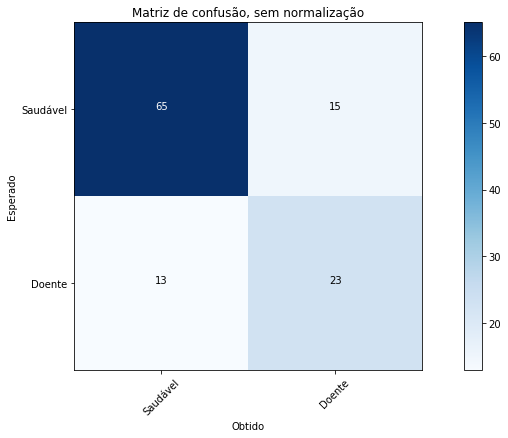

<Figure size 432x288 with 0 Axes>

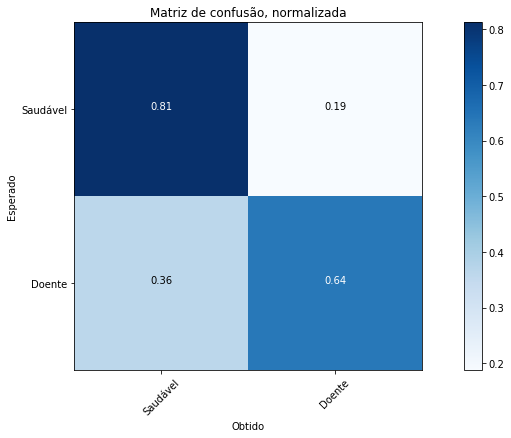

In [17]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Matriz de confusão sobre diabetes',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
    plt.figure(figsize=(12,6))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('Esperado')
    plt.xlabel('Obtido')
# Matriz de confusão

cnf_matrix = confusion_matrix(yTeste, yPred)
np.set_printoptions(precision=2)
# Sem normalização
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=nomes,
                      title='Matriz de confusão, sem normalização')

# Normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=nomes, normalize=True,
                      title='Matriz de confusão, normalizada')


## Comparativo esperado e obtido

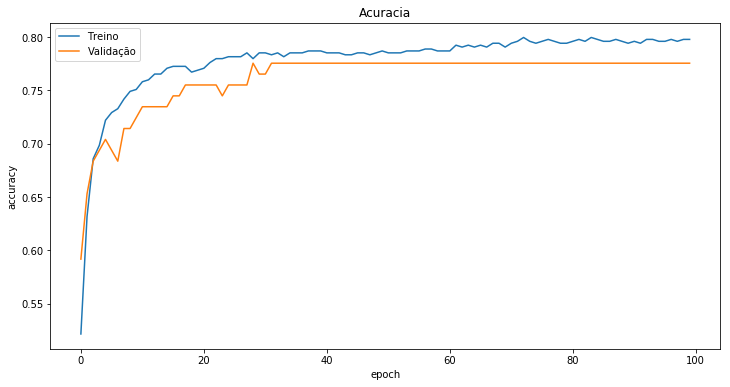

In [18]:
plt.figure(figsize=(12,6))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Acuracia')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

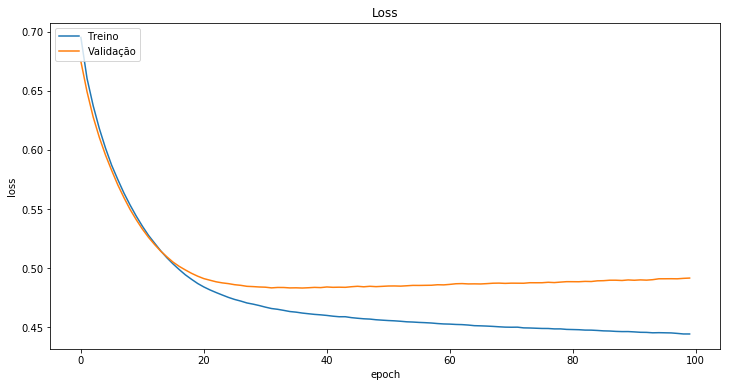

In [19]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

## Aumentando as épocas

In [20]:
history = model.fit(xTreino, yTreino, epochs=2000,validation_split=0.15, shuffle=True)

Train on 554 samples, validate on 98 samples
Epoch 1/2000
554/554 [==============================] - 0s 54us/step - loss: 0.4441 - acc: 0.7978 - val_loss: 0.4916 - val_acc: 0.7755
Epoch 2/2000
554/554 [==============================] - 0s 52us/step - loss: 0.4439 - acc: 0.7996 - val_loss: 0.4919 - val_acc: 0.7755
Epoch 3/2000
554/554 [==============================] - 0s 59us/step - loss: 0.4438 - acc: 0.7978 - val_loss: 0.4916 - val_acc: 0.7755
Epoch 4/2000
554/554 [==============================] - 0s 49us/step - loss: 0.4435 - acc: 0.7996 - val_loss: 0.4919 - val_acc: 0.7755
Epoch 5/2000
554/554 [==============================] - 0s 52us/step - loss: 0.4434 - acc: 0.7978 - val_loss: 0.4921 - val_acc: 0.7755
Epoch 6/2000
554/554 [==============================] - 0s 48us/step - loss: 0.4431 - acc: 0.7978 - val_loss: 0.4919 - val_acc: 0.7755
Epoch 7/2000
554/554 [==============================] - 0s 49us/step - loss: 0.4432 - acc: 0.7960 - val_loss: 0.4927 - val_acc: 0.7755
Epoch 8/20

Epoch 61/2000
554/554 [==============================] - 0s 52us/step - loss: 0.4342 - acc: 0.8069 - val_loss: 0.5017 - val_acc: 0.7551
Epoch 62/2000
554/554 [==============================] - 0s 60us/step - loss: 0.4338 - acc: 0.8087 - val_loss: 0.5026 - val_acc: 0.7653
Epoch 63/2000
554/554 [==============================] - 0s 79us/step - loss: 0.4335 - acc: 0.8087 - val_loss: 0.5028 - val_acc: 0.7653
Epoch 64/2000
554/554 [==============================] - 0s 71us/step - loss: 0.4333 - acc: 0.8087 - val_loss: 0.5027 - val_acc: 0.7551
Epoch 65/2000
554/554 [==============================] - 0s 55us/step - loss: 0.4330 - acc: 0.8087 - val_loss: 0.5029 - val_acc: 0.7551
Epoch 66/2000
554/554 [==============================] - 0s 49us/step - loss: 0.4330 - acc: 0.8051 - val_loss: 0.5030 - val_acc: 0.7551
Epoch 67/2000
554/554 [==============================] - 0s 49us/step - loss: 0.4329 - acc: 0.8069 - val_loss: 0.5032 - val_acc: 0.7551
Epoch 68/2000
554/554 [=========================

554/554 [==============================] - 0s 45us/step - loss: 0.4237 - acc: 0.8141 - val_loss: 0.5134 - val_acc: 0.7551
Epoch 122/2000
554/554 [==============================] - 0s 51us/step - loss: 0.4233 - acc: 0.8141 - val_loss: 0.5133 - val_acc: 0.7551
Epoch 123/2000
554/554 [==============================] - 0s 76us/step - loss: 0.4230 - acc: 0.8141 - val_loss: 0.5129 - val_acc: 0.7551
Epoch 124/2000
554/554 [==============================] - 0s 71us/step - loss: 0.4226 - acc: 0.8177 - val_loss: 0.5130 - val_acc: 0.7551
Epoch 125/2000
554/554 [==============================] - 0s 82us/step - loss: 0.4224 - acc: 0.8159 - val_loss: 0.5132 - val_acc: 0.7551
Epoch 126/2000
554/554 [==============================] - 0s 60us/step - loss: 0.4230 - acc: 0.8177 - val_loss: 0.5139 - val_acc: 0.7551
Epoch 127/2000
554/554 [==============================] - 0s 47us/step - loss: 0.4224 - acc: 0.8177 - val_loss: 0.5137 - val_acc: 0.7551
Epoch 128/2000
554/554 [==============================] 

Epoch 181/2000
554/554 [==============================] - 0s 45us/step - loss: 0.4128 - acc: 0.8195 - val_loss: 0.5219 - val_acc: 0.7551
Epoch 182/2000
554/554 [==============================] - 0s 49us/step - loss: 0.4124 - acc: 0.8195 - val_loss: 0.5219 - val_acc: 0.7449
Epoch 183/2000
554/554 [==============================] - 0s 47us/step - loss: 0.4123 - acc: 0.8195 - val_loss: 0.5219 - val_acc: 0.7449
Epoch 184/2000
554/554 [==============================] - 0s 44us/step - loss: 0.4125 - acc: 0.8195 - val_loss: 0.5226 - val_acc: 0.7449
Epoch 185/2000
554/554 [==============================] - 0s 63us/step - loss: 0.4124 - acc: 0.8195 - val_loss: 0.5223 - val_acc: 0.7449
Epoch 186/2000
554/554 [==============================] - 0s 51us/step - loss: 0.4118 - acc: 0.8195 - val_loss: 0.5224 - val_acc: 0.7449
Epoch 187/2000
554/554 [==============================] - 0s 48us/step - loss: 0.4119 - acc: 0.8195 - val_loss: 0.5225 - val_acc: 0.7449
Epoch 188/2000
554/554 [=================

Epoch 241/2000
554/554 [==============================] - 0s 50us/step - loss: 0.4030 - acc: 0.8159 - val_loss: 0.5320 - val_acc: 0.7551
Epoch 242/2000
554/554 [==============================] - 0s 62us/step - loss: 0.4029 - acc: 0.8159 - val_loss: 0.5321 - val_acc: 0.7653
Epoch 243/2000
554/554 [==============================] - 0s 76us/step - loss: 0.4027 - acc: 0.8159 - val_loss: 0.5321 - val_acc: 0.7653
Epoch 244/2000
554/554 [==============================] - 0s 76us/step - loss: 0.4025 - acc: 0.8177 - val_loss: 0.5323 - val_acc: 0.7653
Epoch 245/2000
554/554 [==============================] - 0s 72us/step - loss: 0.4025 - acc: 0.8177 - val_loss: 0.5325 - val_acc: 0.7653
Epoch 246/2000
554/554 [==============================] - 0s 68us/step - loss: 0.4023 - acc: 0.8159 - val_loss: 0.5329 - val_acc: 0.7653
Epoch 247/2000
554/554 [==============================] - 0s 71us/step - loss: 0.4020 - acc: 0.8195 - val_loss: 0.5331 - val_acc: 0.7653
Epoch 248/2000
554/554 [=================

Epoch 301/2000
554/554 [==============================] - 0s 43us/step - loss: 0.3938 - acc: 0.8177 - val_loss: 0.5425 - val_acc: 0.7653
Epoch 302/2000
554/554 [==============================] - 0s 59us/step - loss: 0.3936 - acc: 0.8177 - val_loss: 0.5427 - val_acc: 0.7653
Epoch 303/2000
554/554 [==============================] - 0s 71us/step - loss: 0.3934 - acc: 0.8195 - val_loss: 0.5428 - val_acc: 0.7653
Epoch 304/2000
554/554 [==============================] - 0s 62us/step - loss: 0.3931 - acc: 0.8195 - val_loss: 0.5432 - val_acc: 0.7653
Epoch 305/2000
554/554 [==============================] - 0s 67us/step - loss: 0.3931 - acc: 0.8177 - val_loss: 0.5435 - val_acc: 0.7653
Epoch 306/2000
554/554 [==============================] - 0s 62us/step - loss: 0.3932 - acc: 0.8195 - val_loss: 0.5438 - val_acc: 0.7653
Epoch 307/2000
554/554 [==============================] - 0s 69us/step - loss: 0.3927 - acc: 0.8195 - val_loss: 0.5436 - val_acc: 0.7653
Epoch 308/2000
554/554 [=================

Epoch 361/2000
554/554 [==============================] - 0s 60us/step - loss: 0.3839 - acc: 0.8213 - val_loss: 0.5539 - val_acc: 0.7449
Epoch 362/2000
554/554 [==============================] - 0s 49us/step - loss: 0.3836 - acc: 0.8231 - val_loss: 0.5544 - val_acc: 0.7551
Epoch 363/2000
554/554 [==============================] - 0s 50us/step - loss: 0.3839 - acc: 0.8231 - val_loss: 0.5541 - val_acc: 0.7449
Epoch 364/2000
554/554 [==============================] - 0s 52us/step - loss: 0.3833 - acc: 0.8213 - val_loss: 0.5549 - val_acc: 0.7449
Epoch 365/2000
554/554 [==============================] - 0s 55us/step - loss: 0.3834 - acc: 0.8249 - val_loss: 0.5543 - val_acc: 0.7449
Epoch 366/2000
554/554 [==============================] - 0s 49us/step - loss: 0.3829 - acc: 0.8249 - val_loss: 0.5550 - val_acc: 0.7449
Epoch 367/2000
554/554 [==============================] - 0s 48us/step - loss: 0.3831 - acc: 0.8267 - val_loss: 0.5548 - val_acc: 0.7449
Epoch 368/2000
554/554 [=================

Epoch 421/2000
554/554 [==============================] - 0s 63us/step - loss: 0.3749 - acc: 0.8339 - val_loss: 0.5614 - val_acc: 0.7551
Epoch 422/2000
554/554 [==============================] - 0s 67us/step - loss: 0.3749 - acc: 0.8339 - val_loss: 0.5618 - val_acc: 0.7347
Epoch 423/2000
554/554 [==============================] - 0s 77us/step - loss: 0.3747 - acc: 0.8321 - val_loss: 0.5620 - val_acc: 0.7449
Epoch 424/2000
554/554 [==============================] - 0s 73us/step - loss: 0.3746 - acc: 0.8321 - val_loss: 0.5621 - val_acc: 0.7449
Epoch 425/2000
554/554 [==============================] - 0s 62us/step - loss: 0.3744 - acc: 0.8321 - val_loss: 0.5620 - val_acc: 0.7347
Epoch 426/2000
554/554 [==============================] - 0s 54us/step - loss: 0.3745 - acc: 0.8321 - val_loss: 0.5623 - val_acc: 0.7449
Epoch 427/2000
554/554 [==============================] - 0s 49us/step - loss: 0.3741 - acc: 0.8339 - val_loss: 0.5621 - val_acc: 0.7347
Epoch 428/2000
554/554 [=================

Epoch 481/2000
554/554 [==============================] - 0s 66us/step - loss: 0.3662 - acc: 0.8394 - val_loss: 0.5684 - val_acc: 0.7347
Epoch 482/2000
554/554 [==============================] - 0s 52us/step - loss: 0.3661 - acc: 0.8412 - val_loss: 0.5691 - val_acc: 0.7245
Epoch 483/2000
554/554 [==============================] - 0s 59us/step - loss: 0.3661 - acc: 0.8412 - val_loss: 0.5680 - val_acc: 0.7143
Epoch 484/2000
554/554 [==============================] - 0s 72us/step - loss: 0.3661 - acc: 0.8375 - val_loss: 0.5689 - val_acc: 0.7245
Epoch 485/2000
554/554 [==============================] - 0s 60us/step - loss: 0.3658 - acc: 0.8394 - val_loss: 0.5687 - val_acc: 0.7347
Epoch 486/2000
554/554 [==============================] - 0s 59us/step - loss: 0.3657 - acc: 0.8430 - val_loss: 0.5681 - val_acc: 0.7347
Epoch 487/2000
554/554 [==============================] - 0s 54us/step - loss: 0.3656 - acc: 0.8412 - val_loss: 0.5687 - val_acc: 0.7143
Epoch 488/2000
554/554 [=================

Epoch 541/2000
554/554 [==============================] - 0s 61us/step - loss: 0.3581 - acc: 0.8466 - val_loss: 0.5735 - val_acc: 0.7347
Epoch 542/2000
554/554 [==============================] - 0s 56us/step - loss: 0.3580 - acc: 0.8484 - val_loss: 0.5735 - val_acc: 0.7449
Epoch 543/2000
554/554 [==============================] - 0s 67us/step - loss: 0.3578 - acc: 0.8484 - val_loss: 0.5744 - val_acc: 0.7551
Epoch 544/2000
554/554 [==============================] - 0s 51us/step - loss: 0.3577 - acc: 0.8484 - val_loss: 0.5746 - val_acc: 0.7551
Epoch 545/2000
554/554 [==============================] - 0s 57us/step - loss: 0.3580 - acc: 0.8466 - val_loss: 0.5743 - val_acc: 0.7551
Epoch 546/2000
554/554 [==============================] - 0s 45us/step - loss: 0.3575 - acc: 0.8484 - val_loss: 0.5733 - val_acc: 0.7551
Epoch 547/2000
554/554 [==============================] - 0s 49us/step - loss: 0.3573 - acc: 0.8502 - val_loss: 0.5731 - val_acc: 0.7551
Epoch 548/2000
554/554 [=================

Epoch 601/2000
554/554 [==============================] - 0s 44us/step - loss: 0.3507 - acc: 0.8502 - val_loss: 0.5768 - val_acc: 0.7551
Epoch 602/2000
554/554 [==============================] - 0s 60us/step - loss: 0.3505 - acc: 0.8502 - val_loss: 0.5766 - val_acc: 0.7551
Epoch 603/2000
554/554 [==============================] - 0s 51us/step - loss: 0.3508 - acc: 0.8502 - val_loss: 0.5776 - val_acc: 0.7551
Epoch 604/2000
554/554 [==============================] - 0s 48us/step - loss: 0.3505 - acc: 0.8502 - val_loss: 0.5771 - val_acc: 0.7551
Epoch 605/2000
554/554 [==============================] - 0s 56us/step - loss: 0.3503 - acc: 0.8502 - val_loss: 0.5779 - val_acc: 0.7551
Epoch 606/2000
554/554 [==============================] - 0s 51us/step - loss: 0.3505 - acc: 0.8502 - val_loss: 0.5767 - val_acc: 0.7551
Epoch 607/2000
554/554 [==============================] - 0s 51us/step - loss: 0.3503 - acc: 0.8502 - val_loss: 0.5775 - val_acc: 0.7551
Epoch 608/2000
554/554 [=================

Epoch 661/2000
554/554 [==============================] - 0s 68us/step - loss: 0.3443 - acc: 0.8502 - val_loss: 0.5814 - val_acc: 0.7551
Epoch 662/2000
554/554 [==============================] - 0s 75us/step - loss: 0.3442 - acc: 0.8484 - val_loss: 0.5805 - val_acc: 0.7551
Epoch 663/2000
554/554 [==============================] - 0s 70us/step - loss: 0.3443 - acc: 0.8502 - val_loss: 0.5813 - val_acc: 0.7551
Epoch 664/2000
554/554 [==============================] - 0s 63us/step - loss: 0.3442 - acc: 0.8502 - val_loss: 0.5816 - val_acc: 0.7551
Epoch 665/2000
554/554 [==============================] - 0s 79us/step - loss: 0.3440 - acc: 0.8502 - val_loss: 0.5813 - val_acc: 0.7551
Epoch 666/2000
554/554 [==============================] - 0s 64us/step - loss: 0.3439 - acc: 0.8502 - val_loss: 0.5821 - val_acc: 0.7551
Epoch 667/2000
554/554 [==============================] - 0s 68us/step - loss: 0.3440 - acc: 0.8502 - val_loss: 0.5824 - val_acc: 0.7551
Epoch 668/2000
554/554 [=================

Epoch 721/2000
554/554 [==============================] - 0s 65us/step - loss: 0.3377 - acc: 0.8484 - val_loss: 0.5822 - val_acc: 0.7551
Epoch 722/2000
554/554 [==============================] - 0s 81us/step - loss: 0.3376 - acc: 0.8484 - val_loss: 0.5825 - val_acc: 0.7551
Epoch 723/2000
554/554 [==============================] - 0s 78us/step - loss: 0.3374 - acc: 0.8484 - val_loss: 0.5833 - val_acc: 0.7551
Epoch 724/2000
554/554 [==============================] - 0s 62us/step - loss: 0.3370 - acc: 0.8484 - val_loss: 0.5839 - val_acc: 0.7551
Epoch 725/2000
554/554 [==============================] - 0s 69us/step - loss: 0.3373 - acc: 0.8484 - val_loss: 0.5849 - val_acc: 0.7551
Epoch 726/2000
554/554 [==============================] - 0s 70us/step - loss: 0.3370 - acc: 0.8484 - val_loss: 0.5842 - val_acc: 0.7551
Epoch 727/2000
554/554 [==============================] - 0s 80us/step - loss: 0.3371 - acc: 0.8502 - val_loss: 0.5832 - val_acc: 0.7551
Epoch 728/2000
554/554 [=================

Epoch 781/2000
554/554 [==============================] - 0s 44us/step - loss: 0.3304 - acc: 0.8502 - val_loss: 0.5873 - val_acc: 0.7551
Epoch 782/2000
554/554 [==============================] - 0s 65us/step - loss: 0.3309 - acc: 0.8520 - val_loss: 0.5878 - val_acc: 0.7551
Epoch 783/2000
554/554 [==============================] - 0s 60us/step - loss: 0.3304 - acc: 0.8520 - val_loss: 0.5872 - val_acc: 0.7551
Epoch 784/2000
554/554 [==============================] - 0s 74us/step - loss: 0.3305 - acc: 0.8520 - val_loss: 0.5875 - val_acc: 0.7551
Epoch 785/2000
554/554 [==============================] - 0s 54us/step - loss: 0.3305 - acc: 0.8556 - val_loss: 0.5878 - val_acc: 0.7551
Epoch 786/2000
554/554 [==============================] - 0s 74us/step - loss: 0.3300 - acc: 0.8502 - val_loss: 0.5870 - val_acc: 0.7551
Epoch 787/2000
554/554 [==============================] - 0s 69us/step - loss: 0.3301 - acc: 0.8484 - val_loss: 0.5878 - val_acc: 0.7551
Epoch 788/2000
554/554 [=================

Epoch 841/2000
554/554 [==============================] - 0s 44us/step - loss: 0.3237 - acc: 0.8538 - val_loss: 0.5964 - val_acc: 0.7551
Epoch 842/2000
554/554 [==============================] - 0s 53us/step - loss: 0.3236 - acc: 0.8574 - val_loss: 0.5959 - val_acc: 0.7449
Epoch 843/2000
554/554 [==============================] - 0s 74us/step - loss: 0.3236 - acc: 0.8574 - val_loss: 0.5964 - val_acc: 0.7449
Epoch 844/2000
554/554 [==============================] - 0s 70us/step - loss: 0.3236 - acc: 0.8538 - val_loss: 0.5963 - val_acc: 0.7449
Epoch 845/2000
554/554 [==============================] - 0s 72us/step - loss: 0.3232 - acc: 0.8538 - val_loss: 0.5970 - val_acc: 0.7449
Epoch 846/2000
554/554 [==============================] - 0s 66us/step - loss: 0.3233 - acc: 0.8538 - val_loss: 0.5975 - val_acc: 0.7449
Epoch 847/2000
554/554 [==============================] - 0s 71us/step - loss: 0.3230 - acc: 0.8592 - val_loss: 0.5963 - val_acc: 0.7551
Epoch 848/2000
554/554 [=================

Epoch 901/2000
554/554 [==============================] - 0s 46us/step - loss: 0.3173 - acc: 0.8574 - val_loss: 0.6047 - val_acc: 0.7449
Epoch 902/2000
554/554 [==============================] - 0s 53us/step - loss: 0.3167 - acc: 0.8574 - val_loss: 0.6049 - val_acc: 0.7449
Epoch 903/2000
554/554 [==============================] - 0s 57us/step - loss: 0.3170 - acc: 0.8592 - val_loss: 0.6045 - val_acc: 0.7449
Epoch 904/2000
554/554 [==============================] - 0s 66us/step - loss: 0.3169 - acc: 0.8592 - val_loss: 0.6058 - val_acc: 0.7449
Epoch 905/2000
554/554 [==============================] - 0s 58us/step - loss: 0.3167 - acc: 0.8610 - val_loss: 0.6045 - val_acc: 0.7449
Epoch 906/2000
554/554 [==============================] - 0s 59us/step - loss: 0.3164 - acc: 0.8592 - val_loss: 0.6048 - val_acc: 0.7449
Epoch 907/2000
554/554 [==============================] - 0s 69us/step - loss: 0.3163 - acc: 0.8610 - val_loss: 0.6041 - val_acc: 0.7449
Epoch 908/2000
554/554 [=================

Epoch 961/2000
554/554 [==============================] - 0s 47us/step - loss: 0.3102 - acc: 0.8646 - val_loss: 0.6162 - val_acc: 0.7449
Epoch 962/2000
554/554 [==============================] - 0s 72us/step - loss: 0.3108 - acc: 0.8592 - val_loss: 0.6161 - val_acc: 0.7551
Epoch 963/2000
554/554 [==============================] - 0s 78us/step - loss: 0.3102 - acc: 0.8628 - val_loss: 0.6149 - val_acc: 0.7449
Epoch 964/2000
554/554 [==============================] - 0s 66us/step - loss: 0.3100 - acc: 0.8646 - val_loss: 0.6157 - val_acc: 0.7449
Epoch 965/2000
554/554 [==============================] - 0s 66us/step - loss: 0.3101 - acc: 0.8610 - val_loss: 0.6148 - val_acc: 0.7449
Epoch 966/2000
554/554 [==============================] - 0s 64us/step - loss: 0.3100 - acc: 0.8664 - val_loss: 0.6139 - val_acc: 0.7449
Epoch 967/2000
554/554 [==============================] - 0s 68us/step - loss: 0.3098 - acc: 0.8646 - val_loss: 0.6145 - val_acc: 0.7449
Epoch 968/2000
554/554 [=================

554/554 [==============================] - 0s 76us/step - loss: 0.2981 - acc: 0.8664 - val_loss: 0.6309 - val_acc: 0.7449
Epoch 1080/2000
554/554 [==============================] - 0s 73us/step - loss: 0.2981 - acc: 0.8646 - val_loss: 0.6315 - val_acc: 0.7551
Epoch 1081/2000
554/554 [==============================] - 0s 79us/step - loss: 0.2980 - acc: 0.8646 - val_loss: 0.6320 - val_acc: 0.7551
Epoch 1082/2000
554/554 [==============================] - 0s 77us/step - loss: 0.2981 - acc: 0.8664 - val_loss: 0.6315 - val_acc: 0.7449
Epoch 1083/2000
554/554 [==============================] - 0s 75us/step - loss: 0.2976 - acc: 0.8664 - val_loss: 0.6319 - val_acc: 0.7551
Epoch 1084/2000
554/554 [==============================] - 0s 76us/step - loss: 0.2976 - acc: 0.8664 - val_loss: 0.6318 - val_acc: 0.7551
Epoch 1085/2000
554/554 [==============================] - 0s 72us/step - loss: 0.2981 - acc: 0.8646 - val_loss: 0.6326 - val_acc: 0.7551
Epoch 1086/2000
554/554 [=========================

554/554 [==============================] - 0s 58us/step - loss: 0.2869 - acc: 0.8773 - val_loss: 0.6514 - val_acc: 0.7449
Epoch 1198/2000
554/554 [==============================] - 0s 71us/step - loss: 0.2868 - acc: 0.8773 - val_loss: 0.6516 - val_acc: 0.7449
Epoch 1199/2000
554/554 [==============================] - 0s 56us/step - loss: 0.2865 - acc: 0.8773 - val_loss: 0.6511 - val_acc: 0.7449
Epoch 1200/2000
554/554 [==============================] - 0s 83us/step - loss: 0.2864 - acc: 0.8773 - val_loss: 0.6513 - val_acc: 0.7449
Epoch 1201/2000
554/554 [==============================] - 0s 63us/step - loss: 0.2864 - acc: 0.8755 - val_loss: 0.6518 - val_acc: 0.7449
Epoch 1202/2000
554/554 [==============================] - 0s 57us/step - loss: 0.2863 - acc: 0.8791 - val_loss: 0.6527 - val_acc: 0.7449
Epoch 1203/2000
554/554 [==============================] - 0s 57us/step - loss: 0.2864 - acc: 0.8755 - val_loss: 0.6530 - val_acc: 0.7449
Epoch 1204/2000
554/554 [=========================

554/554 [==============================] - 0s 75us/step - loss: 0.2747 - acc: 0.8791 - val_loss: 0.6779 - val_acc: 0.7245
Epoch 1316/2000
554/554 [==============================] - 0s 71us/step - loss: 0.2746 - acc: 0.8791 - val_loss: 0.6775 - val_acc: 0.7245
Epoch 1317/2000
554/554 [==============================] - 0s 72us/step - loss: 0.2745 - acc: 0.8809 - val_loss: 0.6779 - val_acc: 0.7245
Epoch 1318/2000
554/554 [==============================] - 0s 73us/step - loss: 0.2745 - acc: 0.8809 - val_loss: 0.6779 - val_acc: 0.7245
Epoch 1319/2000
554/554 [==============================] - 0s 71us/step - loss: 0.2746 - acc: 0.8827 - val_loss: 0.6796 - val_acc: 0.7245
Epoch 1320/2000
554/554 [==============================] - 0s 73us/step - loss: 0.2742 - acc: 0.8791 - val_loss: 0.6790 - val_acc: 0.7245
Epoch 1321/2000
554/554 [==============================] - 0s 75us/step - loss: 0.2742 - acc: 0.8809 - val_loss: 0.6795 - val_acc: 0.7245
Epoch 1322/2000
554/554 [=========================

554/554 [==============================] - 0s 75us/step - loss: 0.2624 - acc: 0.8863 - val_loss: 0.7070 - val_acc: 0.7041
Epoch 1434/2000
554/554 [==============================] - 0s 71us/step - loss: 0.2625 - acc: 0.8845 - val_loss: 0.7067 - val_acc: 0.7041
Epoch 1435/2000
554/554 [==============================] - 0s 76us/step - loss: 0.2623 - acc: 0.8845 - val_loss: 0.7076 - val_acc: 0.7041
Epoch 1436/2000
554/554 [==============================] - 0s 80us/step - loss: 0.2625 - acc: 0.8845 - val_loss: 0.7074 - val_acc: 0.7041
Epoch 1437/2000
554/554 [==============================] - 0s 74us/step - loss: 0.2619 - acc: 0.8863 - val_loss: 0.7088 - val_acc: 0.7041
Epoch 1438/2000
554/554 [==============================] - 0s 71us/step - loss: 0.2621 - acc: 0.8845 - val_loss: 0.7092 - val_acc: 0.7041
Epoch 1439/2000
554/554 [==============================] - 0s 68us/step - loss: 0.2618 - acc: 0.8827 - val_loss: 0.7107 - val_acc: 0.7041
Epoch 1440/2000
554/554 [=========================

554/554 [==============================] - 0s 80us/step - loss: 0.2493 - acc: 0.9025 - val_loss: 0.7395 - val_acc: 0.6939
Epoch 1552/2000
554/554 [==============================] - 0s 73us/step - loss: 0.2493 - acc: 0.9043 - val_loss: 0.7380 - val_acc: 0.7041
Epoch 1553/2000
554/554 [==============================] - 0s 73us/step - loss: 0.2491 - acc: 0.9025 - val_loss: 0.7386 - val_acc: 0.6939
Epoch 1554/2000
554/554 [==============================] - 0s 77us/step - loss: 0.2492 - acc: 0.9043 - val_loss: 0.7398 - val_acc: 0.6939
Epoch 1555/2000
554/554 [==============================] - 0s 77us/step - loss: 0.2489 - acc: 0.9043 - val_loss: 0.7394 - val_acc: 0.6939
Epoch 1556/2000
554/554 [==============================] - 0s 75us/step - loss: 0.2489 - acc: 0.9043 - val_loss: 0.7401 - val_acc: 0.7041
Epoch 1557/2000
554/554 [==============================] - 0s 72us/step - loss: 0.2487 - acc: 0.9043 - val_loss: 0.7401 - val_acc: 0.6939
Epoch 1558/2000
554/554 [=========================

554/554 [==============================] - 0s 80us/step - loss: 0.2365 - acc: 0.9116 - val_loss: 0.7715 - val_acc: 0.6939
Epoch 1670/2000
554/554 [==============================] - 0s 78us/step - loss: 0.2364 - acc: 0.9116 - val_loss: 0.7719 - val_acc: 0.6939
Epoch 1671/2000
554/554 [==============================] - 0s 72us/step - loss: 0.2365 - acc: 0.9097 - val_loss: 0.7728 - val_acc: 0.6939
Epoch 1672/2000
554/554 [==============================] - 0s 77us/step - loss: 0.2360 - acc: 0.9116 - val_loss: 0.7742 - val_acc: 0.6939
Epoch 1673/2000
554/554 [==============================] - 0s 71us/step - loss: 0.2363 - acc: 0.9097 - val_loss: 0.7756 - val_acc: 0.6939
Epoch 1674/2000
554/554 [==============================] - 0s 73us/step - loss: 0.2360 - acc: 0.9116 - val_loss: 0.7747 - val_acc: 0.6939
Epoch 1675/2000
554/554 [==============================] - 0s 75us/step - loss: 0.2359 - acc: 0.9116 - val_loss: 0.7748 - val_acc: 0.6939
Epoch 1676/2000
554/554 [=========================

554/554 [==============================] - 0s 71us/step - loss: 0.2256 - acc: 0.9134 - val_loss: 0.8039 - val_acc: 0.6939
Epoch 1788/2000
554/554 [==============================] - 0s 73us/step - loss: 0.2255 - acc: 0.9134 - val_loss: 0.8045 - val_acc: 0.6939
Epoch 1789/2000
554/554 [==============================] - 0s 75us/step - loss: 0.2254 - acc: 0.9188 - val_loss: 0.8051 - val_acc: 0.6939
Epoch 1790/2000
554/554 [==============================] - 0s 76us/step - loss: 0.2256 - acc: 0.9170 - val_loss: 0.8041 - val_acc: 0.6939
Epoch 1791/2000
554/554 [==============================] - 0s 75us/step - loss: 0.2254 - acc: 0.9188 - val_loss: 0.8062 - val_acc: 0.6837
Epoch 1792/2000
554/554 [==============================] - 0s 73us/step - loss: 0.2250 - acc: 0.9188 - val_loss: 0.8050 - val_acc: 0.6939
Epoch 1793/2000
554/554 [==============================] - 0s 72us/step - loss: 0.2252 - acc: 0.9170 - val_loss: 0.8041 - val_acc: 0.6837
Epoch 1794/2000
554/554 [=========================

554/554 [==============================] - 0s 72us/step - loss: 0.2152 - acc: 0.9260 - val_loss: 0.8257 - val_acc: 0.6939
Epoch 1906/2000
554/554 [==============================] - 0s 73us/step - loss: 0.2152 - acc: 0.9224 - val_loss: 0.8256 - val_acc: 0.6939
Epoch 1907/2000
554/554 [==============================] - 0s 70us/step - loss: 0.2150 - acc: 0.9242 - val_loss: 0.8259 - val_acc: 0.6939
Epoch 1908/2000
554/554 [==============================] - 0s 70us/step - loss: 0.2151 - acc: 0.9242 - val_loss: 0.8266 - val_acc: 0.6939
Epoch 1909/2000
554/554 [==============================] - 0s 70us/step - loss: 0.2150 - acc: 0.9242 - val_loss: 0.8269 - val_acc: 0.6939
Epoch 1910/2000
554/554 [==============================] - 0s 71us/step - loss: 0.2149 - acc: 0.9260 - val_loss: 0.8277 - val_acc: 0.6939
Epoch 1911/2000
554/554 [==============================] - 0s 71us/step - loss: 0.2147 - acc: 0.9260 - val_loss: 0.8259 - val_acc: 0.6939
Epoch 1912/2000
554/554 [=========================

In [21]:
predictions = history.model.predict(xTeste)
yPred = np.array([round(x[0]) for x in predictions])

## Analisando os resultados

In [22]:
print(classification_report(yTeste,yPred, target_names=nomes))

             precision    recall  f1-score   support

   Saudável       0.88      0.75      0.81        80
     Doente       0.58      0.78      0.67        36

avg / total       0.79      0.76      0.77       116



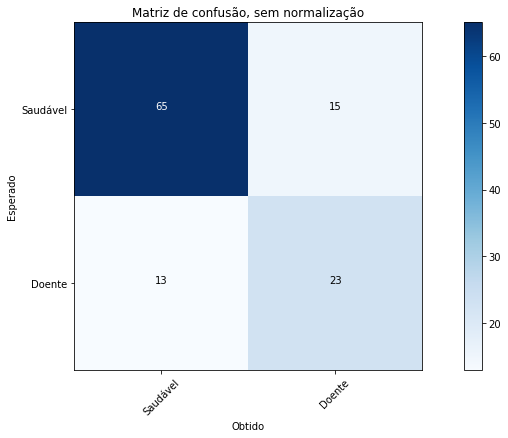

<Figure size 432x288 with 0 Axes>

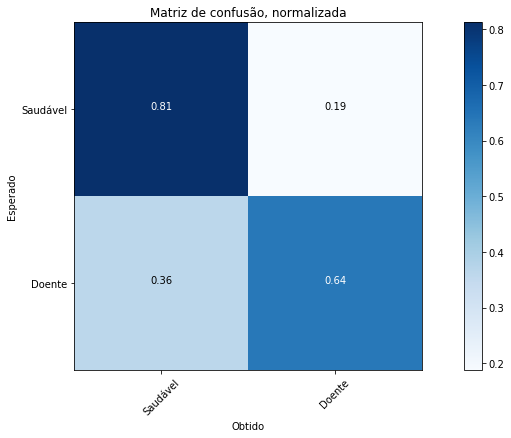

In [23]:
plot_confusion_matrix(cnf_matrix, classes=nomes,
                      title='Matriz de confusão, sem normalização')

# Normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=nomes, normalize=True,
                      title='Matriz de confusão, normalizada')


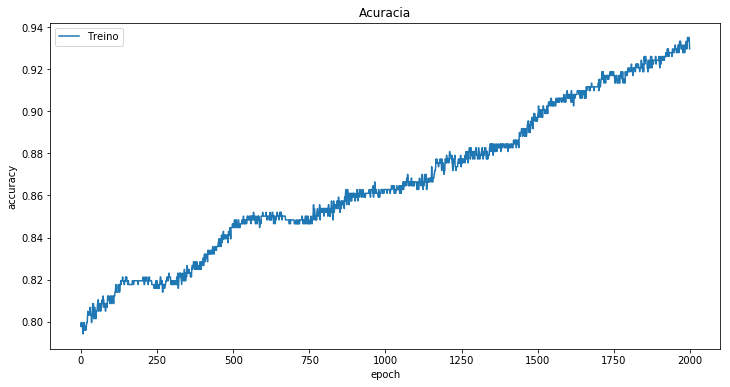

In [24]:
plt.figure(figsize=(12,6))
plt.plot(history.history['acc'])
plt.title('Acuracia')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

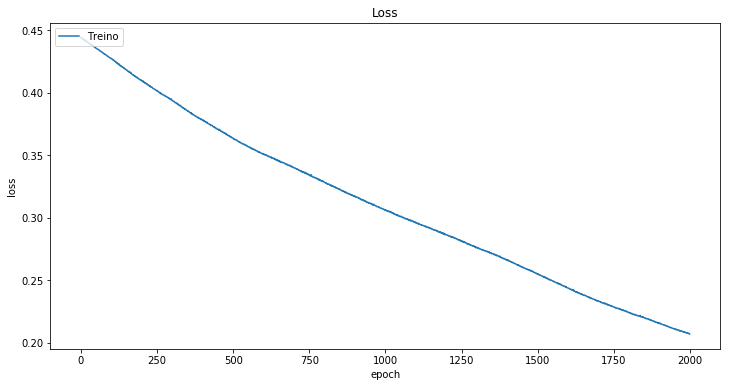

In [25]:
plt.figure(figsize=(12,6))
plt.plot(history.history['loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Treino', 'Validação'], loc='upper left')
plt.show()

### Alteranda a taxa de aprendizado e momentum

In [26]:
model.compile(loss='binary_crossentropy', optimizer=Adam, metrics=['accuracy'])
history = model.fit(xTreino, yTreino, epochs=1000, shuffle=True)
predictions = history.model.predict(xTeste)
yPred = np.array([round(x[0]) for x in predictions])

Epoch 1/1000
652/652 [==============================] - 0s 203us/step - loss: 0.3061 - acc: 0.8911
Epoch 2/1000
652/652 [==============================] - 0s 59us/step - loss: 0.3006 - acc: 0.8972
Epoch 3/1000
652/652 [==============================] - 0s 53us/step - loss: 0.2975 - acc: 0.9003
Epoch 4/1000
652/652 [==============================] - 0s 59us/step - loss: 0.2952 - acc: 0.9018
Epoch 5/1000
652/652 [==============================] - 0s 72us/step - loss: 0.2937 - acc: 0.9018
Epoch 6/1000
652/652 [==============================] - 0s 47us/step - loss: 0.2913 - acc: 0.9018
Epoch 7/1000
652/652 [==============================] - 0s 52us/step - loss: 0.2893 - acc: 0.9003
Epoch 8/1000
652/652 [==============================] - 0s 62us/step - loss: 0.2881 - acc: 0.9003
Epoch 9/1000
652/652 [==============================] - 0s 57us/step - loss: 0.2871 - acc: 0.8972
Epoch 10/1000
652/652 [==============================] - 0s 47us/step - loss: 0.2853 - acc: 0.8988
Epoch 11/1000
652/

652/652 [==============================] - 0s 39us/step - loss: 0.2428 - acc: 0.9095
Epoch 166/1000
652/652 [==============================] - 0s 48us/step - loss: 0.2429 - acc: 0.9080
Epoch 167/1000
652/652 [==============================] - 0s 45us/step - loss: 0.2426 - acc: 0.9110
Epoch 168/1000
652/652 [==============================] - 0s 41us/step - loss: 0.2428 - acc: 0.9034
Epoch 169/1000
652/652 [==============================] - 0s 45us/step - loss: 0.2425 - acc: 0.9080
Epoch 170/1000
652/652 [==============================] - 0s 57us/step - loss: 0.2426 - acc: 0.9110
Epoch 171/1000
652/652 [==============================] - 0s 58us/step - loss: 0.2425 - acc: 0.9110
Epoch 172/1000
652/652 [==============================] - 0s 59us/step - loss: 0.2426 - acc: 0.9064
Epoch 173/1000
652/652 [==============================] - 0s 63us/step - loss: 0.2421 - acc: 0.9110
Epoch 174/1000
652/652 [==============================] - 0s 55us/step - loss: 0.2420 - acc: 0.9080
Epoch 175/1000


652/652 [==============================] - 0s 49us/step - loss: 0.2321 - acc: 0.9202
Epoch 248/1000
652/652 [==============================] - 0s 52us/step - loss: 0.2320 - acc: 0.9218
Epoch 249/1000
652/652 [==============================] - 0s 48us/step - loss: 0.2320 - acc: 0.9187
Epoch 250/1000
652/652 [==============================] - 0s 62us/step - loss: 0.2317 - acc: 0.9233
Epoch 251/1000
652/652 [==============================] - 0s 62us/step - loss: 0.2312 - acc: 0.9248
Epoch 252/1000
652/652 [==============================] - 0s 61us/step - loss: 0.2312 - acc: 0.9233
Epoch 253/1000
652/652 [==============================] - 0s 66us/step - loss: 0.2312 - acc: 0.9218
Epoch 254/1000
652/652 [==============================] - 0s 67us/step - loss: 0.2316 - acc: 0.9187
Epoch 255/1000
652/652 [==============================] - 0s 51us/step - loss: 0.2313 - acc: 0.9187
Epoch 256/1000
652/652 [==============================] - 0s 57us/step - loss: 0.2315 - acc: 0.9218
Epoch 257/1000


652/652 [==============================] - 0s 49us/step - loss: 0.2203 - acc: 0.9218
Epoch 330/1000
652/652 [==============================] - 0s 51us/step - loss: 0.2204 - acc: 0.9218
Epoch 331/1000
652/652 [==============================] - 0s 59us/step - loss: 0.2202 - acc: 0.9202
Epoch 332/1000
652/652 [==============================] - 0s 75us/step - loss: 0.2203 - acc: 0.9233
Epoch 333/1000
652/652 [==============================] - 0s 60us/step - loss: 0.2197 - acc: 0.9248
Epoch 334/1000
652/652 [==============================] - 0s 69us/step - loss: 0.2198 - acc: 0.9218
Epoch 335/1000
652/652 [==============================] - 0s 65us/step - loss: 0.2207 - acc: 0.9202
Epoch 336/1000
652/652 [==============================] - 0s 64us/step - loss: 0.2188 - acc: 0.9218
Epoch 337/1000
652/652 [==============================] - 0s 77us/step - loss: 0.2192 - acc: 0.9248
Epoch 338/1000
652/652 [==============================] - 0s 63us/step - loss: 0.2186 - acc: 0.9233
Epoch 339/1000


652/652 [==============================] - 0s 50us/step - loss: 0.2075 - acc: 0.9310
Epoch 412/1000
652/652 [==============================] - 0s 42us/step - loss: 0.2080 - acc: 0.9294
Epoch 413/1000
652/652 [==============================] - 0s 50us/step - loss: 0.2076 - acc: 0.9294
Epoch 414/1000
652/652 [==============================] - 0s 54us/step - loss: 0.2075 - acc: 0.9294
Epoch 415/1000
652/652 [==============================] - 0s 52us/step - loss: 0.2075 - acc: 0.9294
Epoch 416/1000
652/652 [==============================] - 0s 62us/step - loss: 0.2078 - acc: 0.9310
Epoch 417/1000
652/652 [==============================] - 0s 66us/step - loss: 0.2072 - acc: 0.9294
Epoch 418/1000
652/652 [==============================] - 0s 64us/step - loss: 0.2068 - acc: 0.9294
Epoch 419/1000
652/652 [==============================] - 0s 65us/step - loss: 0.2073 - acc: 0.9310
Epoch 420/1000
652/652 [==============================] - 0s 63us/step - loss: 0.2070 - acc: 0.9310
Epoch 421/1000


652/652 [==============================] - 0s 50us/step - loss: 0.1989 - acc: 0.9371
Epoch 494/1000
652/652 [==============================] - 0s 48us/step - loss: 0.1988 - acc: 0.9356
Epoch 495/1000
652/652 [==============================] - 0s 54us/step - loss: 0.1988 - acc: 0.9371
Epoch 496/1000
652/652 [==============================] - 0s 58us/step - loss: 0.1989 - acc: 0.9356
Epoch 497/1000
652/652 [==============================] - 0s 60us/step - loss: 0.1985 - acc: 0.9356
Epoch 498/1000
652/652 [==============================] - 0s 70us/step - loss: 0.1983 - acc: 0.9356
Epoch 499/1000
652/652 [==============================] - 0s 66us/step - loss: 0.1982 - acc: 0.9371
Epoch 500/1000
652/652 [==============================] - 0s 60us/step - loss: 0.1982 - acc: 0.9371
Epoch 501/1000
652/652 [==============================] - 0s 67us/step - loss: 0.1980 - acc: 0.9371
Epoch 502/1000
652/652 [==============================] - 0s 62us/step - loss: 0.1978 - acc: 0.9371
Epoch 503/1000


652/652 [==============================] - 0s 54us/step - loss: 0.1918 - acc: 0.9417
Epoch 576/1000
652/652 [==============================] - 0s 63us/step - loss: 0.1916 - acc: 0.9417
Epoch 577/1000
652/652 [==============================] - 0s 68us/step - loss: 0.1915 - acc: 0.9402
Epoch 578/1000
652/652 [==============================] - 0s 61us/step - loss: 0.1913 - acc: 0.9417
Epoch 579/1000
652/652 [==============================] - 0s 61us/step - loss: 0.1908 - acc: 0.9433
Epoch 580/1000
652/652 [==============================] - 0s 62us/step - loss: 0.1911 - acc: 0.9402
Epoch 581/1000
652/652 [==============================] - 0s 59us/step - loss: 0.1908 - acc: 0.9417
Epoch 582/1000
652/652 [==============================] - 0s 70us/step - loss: 0.1908 - acc: 0.9417
Epoch 583/1000
652/652 [==============================] - 0s 65us/step - loss: 0.1906 - acc: 0.9402
Epoch 584/1000
652/652 [==============================] - 0s 59us/step - loss: 0.1905 - acc: 0.9433
Epoch 585/1000


652/652 [==============================] - 0s 50us/step - loss: 0.1841 - acc: 0.9463
Epoch 658/1000
652/652 [==============================] - 0s 53us/step - loss: 0.1844 - acc: 0.9448
Epoch 659/1000
652/652 [==============================] - 0s 43us/step - loss: 0.1845 - acc: 0.9479
Epoch 660/1000
652/652 [==============================] - 0s 55us/step - loss: 0.1840 - acc: 0.9494
Epoch 661/1000
652/652 [==============================] - 0s 66us/step - loss: 0.1843 - acc: 0.9479
Epoch 662/1000
652/652 [==============================] - 0s 67us/step - loss: 0.1833 - acc: 0.9479
Epoch 663/1000
652/652 [==============================] - 0s 61us/step - loss: 0.1841 - acc: 0.9494
Epoch 664/1000
652/652 [==============================] - 0s 63us/step - loss: 0.1843 - acc: 0.9494
Epoch 665/1000
652/652 [==============================] - 0s 61us/step - loss: 0.1835 - acc: 0.9494
Epoch 666/1000
652/652 [==============================] - 0s 59us/step - loss: 0.1835 - acc: 0.9463
Epoch 667/1000


652/652 [==============================] - 0s 53us/step - loss: 0.1775 - acc: 0.9509
Epoch 740/1000
652/652 [==============================] - 0s 47us/step - loss: 0.1773 - acc: 0.9525
Epoch 741/1000
652/652 [==============================] - 0s 50us/step - loss: 0.1777 - acc: 0.9525
Epoch 742/1000
652/652 [==============================] - 0s 55us/step - loss: 0.1772 - acc: 0.9525
Epoch 743/1000
652/652 [==============================] - 0s 70us/step - loss: 0.1777 - acc: 0.9509
Epoch 744/1000
652/652 [==============================] - 0s 62us/step - loss: 0.1773 - acc: 0.9509
Epoch 745/1000
652/652 [==============================] - 0s 65us/step - loss: 0.1771 - acc: 0.9509
Epoch 746/1000
652/652 [==============================] - 0s 66us/step - loss: 0.1771 - acc: 0.9509
Epoch 747/1000
652/652 [==============================] - 0s 67us/step - loss: 0.1770 - acc: 0.9525
Epoch 748/1000
652/652 [==============================] - 0s 65us/step - loss: 0.1766 - acc: 0.9509
Epoch 749/1000


652/652 [==============================] - 0s 72us/step - loss: 0.1711 - acc: 0.9509
Epoch 822/1000
652/652 [==============================] - 0s 69us/step - loss: 0.1711 - acc: 0.9509
Epoch 823/1000
652/652 [==============================] - 0s 68us/step - loss: 0.1716 - acc: 0.9509
Epoch 824/1000
652/652 [==============================] - 0s 72us/step - loss: 0.1711 - acc: 0.9509
Epoch 825/1000
652/652 [==============================] - 0s 70us/step - loss: 0.1711 - acc: 0.9494
Epoch 826/1000
652/652 [==============================] - 0s 92us/step - loss: 0.1708 - acc: 0.9509
Epoch 827/1000
652/652 [==============================] - 0s 77us/step - loss: 0.1709 - acc: 0.9509
Epoch 828/1000
652/652 [==============================] - 0s 69us/step - loss: 0.1707 - acc: 0.9509
Epoch 829/1000
652/652 [==============================] - 0s 68us/step - loss: 0.1709 - acc: 0.9525
Epoch 830/1000
652/652 [==============================] - 0s 64us/step - loss: 0.1705 - acc: 0.9509
Epoch 831/1000


652/652 [==============================] - 0s 54us/step - loss: 0.1656 - acc: 0.9525
Epoch 904/1000
652/652 [==============================] - 0s 59us/step - loss: 0.1652 - acc: 0.9525
Epoch 905/1000
652/652 [==============================] - 0s 71us/step - loss: 0.1654 - acc: 0.9525
Epoch 906/1000
652/652 [==============================] - 0s 72us/step - loss: 0.1655 - acc: 0.9525
Epoch 907/1000
652/652 [==============================] - 0s 65us/step - loss: 0.1652 - acc: 0.9525
Epoch 908/1000
652/652 [==============================] - 0s 68us/step - loss: 0.1652 - acc: 0.9525
Epoch 909/1000
652/652 [==============================] - 0s 69us/step - loss: 0.1651 - acc: 0.9525
Epoch 910/1000
652/652 [==============================] - 0s 73us/step - loss: 0.1654 - acc: 0.9525
Epoch 911/1000
652/652 [==============================] - 0s 68us/step - loss: 0.1652 - acc: 0.9525
Epoch 912/1000
652/652 [==============================] - 0s 68us/step - loss: 0.1647 - acc: 0.9525
Epoch 913/1000


             precision    recall  f1-score   support

   Saudável       0.82      0.75      0.78        80
     Doente       0.53      0.64      0.58        36

avg / total       0.73      0.72      0.72       116



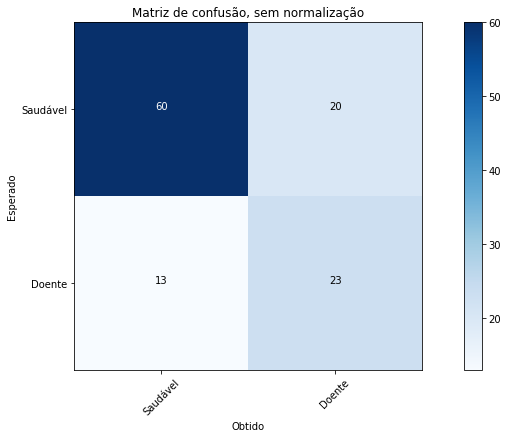

<Figure size 432x288 with 0 Axes>

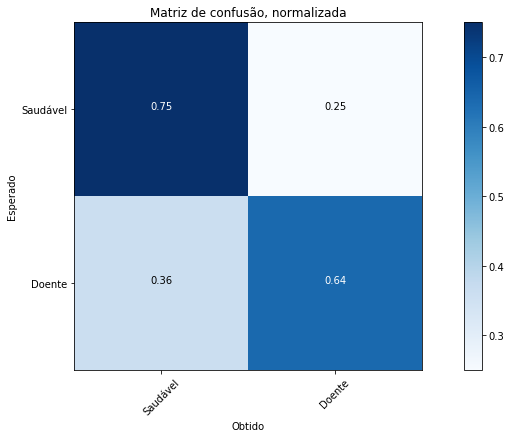

In [27]:
print(classification_report(yTeste,yPred, target_names=nomes))

cnf_matrix = confusion_matrix(yTeste, yPred)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=nomes,
                      title='Matriz de confusão, sem normalização')
# Normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=nomes, normalize=True,
                      title='Matriz de confusão, normalizada')

# Gráficos

In [28]:
import seaborn as sns

In [29]:
rotulos = ['gravida',
 'glicose plamática',
 'perssão arterial diastólica',
 'dobra da pele tríceps',
 'indulina sérica',
 'IMC',
 'Função pedigree',
 'Idade',
          'Diabetes']

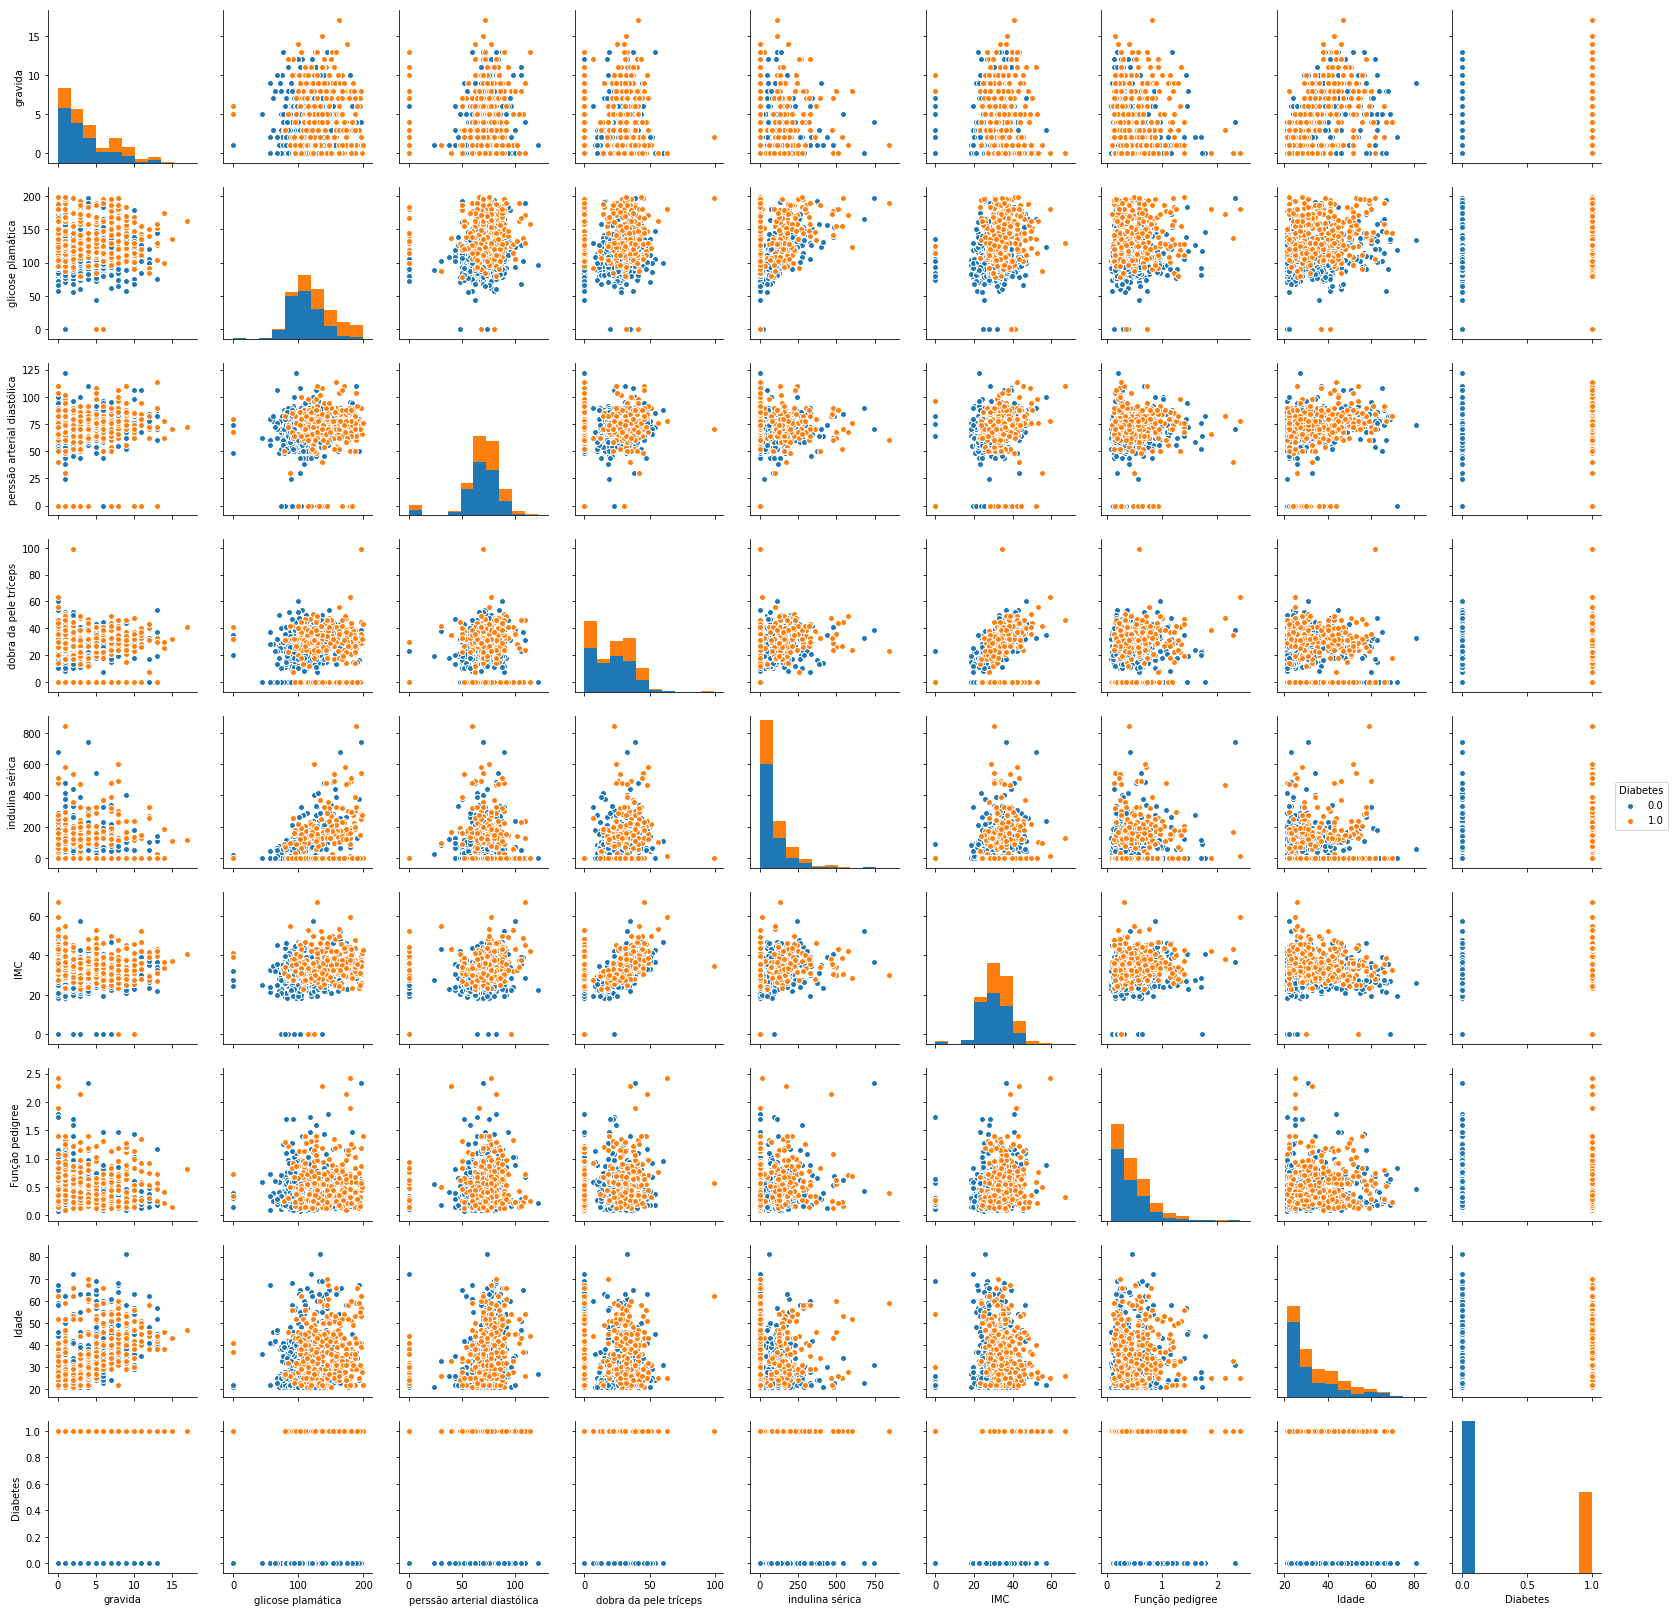

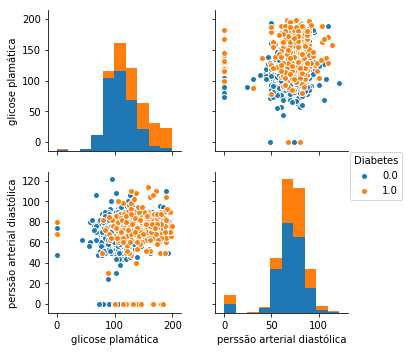

In [30]:
sns_diabetes = pd.DataFrame(dataset,columns=rotulos)
sns.pairplot(sns_diabetes,hue='Diabetes')
sns.pairplot(sns_diabetes,hue='Diabetes', vars=[ 'glicose plamática',  'perssão arterial diastólica'])

In [31]:
model = Sequential()
# relu, sigmoid, tanh
model.add(Dense(9,use_bias=True, input_dim=8, activation='tanh'))
model.add(Dense(9, activation='tanh'))
model.add(Dense(9, activation='tanh'))
model.add(Dense(1, activation='sigmoid'))
model.compile(loss='binary_crossentropy', optimizer=Adam, metrics=['accuracy'])
history = model.fit(xTreino, yTreino, epochs=1000, shuffle=True)
predictions = history.model.predict(xTeste)
yPred = np.array([round(x[0]) for x in predictions])

Epoch 1/1000
652/652 [==============================] - 0s 307us/step - loss: 0.5632 - acc: 0.7255
Epoch 2/1000
652/652 [==============================] - 0s 67us/step - loss: 0.4905 - acc: 0.7653
Epoch 3/1000
652/652 [==============================] - 0s 70us/step - loss: 0.4763 - acc: 0.7699
Epoch 4/1000
652/652 [==============================] - 0s 68us/step - loss: 0.4705 - acc: 0.7684
Epoch 5/1000
652/652 [==============================] - 0s 69us/step - loss: 0.4669 - acc: 0.7822
Epoch 6/1000
652/652 [==============================] - 0s 67us/step - loss: 0.4652 - acc: 0.7745
Epoch 7/1000
652/652 [==============================] - 0s 68us/step - loss: 0.4632 - acc: 0.7791
Epoch 8/1000
652/652 [==============================] - 0s 68us/step - loss: 0.4603 - acc: 0.7822
Epoch 9/1000
652/652 [==============================] - 0s 66us/step - loss: 0.4623 - acc: 0.7853
Epoch 10/1000
652/652 [==============================] - 0s 68us/step - loss: 0.4568 - acc: 0.7868
Epoch 11/1000
652/

652/652 [==============================] - 0s 73us/step - loss: 0.3905 - acc: 0.8267
Epoch 166/1000
652/652 [==============================] - 0s 66us/step - loss: 0.3900 - acc: 0.8344
Epoch 167/1000
652/652 [==============================] - 0s 68us/step - loss: 0.3888 - acc: 0.8313
Epoch 168/1000
652/652 [==============================] - 0s 67us/step - loss: 0.3891 - acc: 0.8298
Epoch 169/1000
652/652 [==============================] - 0s 73us/step - loss: 0.3888 - acc: 0.8298
Epoch 170/1000
652/652 [==============================] - 0s 70us/step - loss: 0.3876 - acc: 0.8313
Epoch 171/1000
652/652 [==============================] - 0s 67us/step - loss: 0.3881 - acc: 0.8252
Epoch 172/1000
652/652 [==============================] - 0s 67us/step - loss: 0.3875 - acc: 0.8298
Epoch 173/1000
652/652 [==============================] - 0s 67us/step - loss: 0.3868 - acc: 0.8313
Epoch 174/1000
652/652 [==============================] - 0s 67us/step - loss: 0.3869 - acc: 0.8267
Epoch 175/1000


652/652 [==============================] - 0s 64us/step - loss: 0.3633 - acc: 0.8328
Epoch 248/1000
652/652 [==============================] - 0s 68us/step - loss: 0.3627 - acc: 0.8282
Epoch 249/1000
652/652 [==============================] - 0s 75us/step - loss: 0.3634 - acc: 0.8313
Epoch 250/1000
652/652 [==============================] - 0s 69us/step - loss: 0.3633 - acc: 0.8328
Epoch 251/1000
652/652 [==============================] - 0s 63us/step - loss: 0.3617 - acc: 0.8328
Epoch 252/1000
652/652 [==============================] - 0s 71us/step - loss: 0.3638 - acc: 0.8282
Epoch 253/1000
652/652 [==============================] - 0s 72us/step - loss: 0.3618 - acc: 0.8282
Epoch 254/1000
652/652 [==============================] - 0s 66us/step - loss: 0.3615 - acc: 0.8298
Epoch 255/1000
652/652 [==============================] - 0s 73us/step - loss: 0.3609 - acc: 0.8298
Epoch 256/1000
652/652 [==============================] - 0s 71us/step - loss: 0.3598 - acc: 0.8344
Epoch 257/1000


652/652 [==============================] - 0s 67us/step - loss: 0.3349 - acc: 0.8436
Epoch 330/1000
652/652 [==============================] - 0s 67us/step - loss: 0.3353 - acc: 0.8436
Epoch 331/1000
652/652 [==============================] - 0s 63us/step - loss: 0.3347 - acc: 0.8405
Epoch 332/1000
652/652 [==============================] - 0s 65us/step - loss: 0.3337 - acc: 0.8390
Epoch 333/1000
652/652 [==============================] - 0s 69us/step - loss: 0.3335 - acc: 0.8390
Epoch 334/1000
652/652 [==============================] - 0s 69us/step - loss: 0.3333 - acc: 0.8374
Epoch 335/1000
652/652 [==============================] - 0s 73us/step - loss: 0.3332 - acc: 0.8405
Epoch 336/1000
652/652 [==============================] - 0s 73us/step - loss: 0.3322 - acc: 0.8405
Epoch 337/1000
652/652 [==============================] - 0s 76us/step - loss: 0.3319 - acc: 0.8451
Epoch 338/1000
652/652 [==============================] - 0s 72us/step - loss: 0.3322 - acc: 0.8436
Epoch 339/1000


652/652 [==============================] - 0s 65us/step - loss: 0.3054 - acc: 0.8497
Epoch 412/1000
652/652 [==============================] - 0s 64us/step - loss: 0.3052 - acc: 0.8543
Epoch 413/1000
652/652 [==============================] - 0s 69us/step - loss: 0.3048 - acc: 0.8543
Epoch 414/1000
652/652 [==============================] - 0s 66us/step - loss: 0.3051 - acc: 0.8558
Epoch 415/1000
652/652 [==============================] - 0s 71us/step - loss: 0.3046 - acc: 0.8543
Epoch 416/1000
652/652 [==============================] - 0s 66us/step - loss: 0.3047 - acc: 0.8543
Epoch 417/1000
652/652 [==============================] - 0s 67us/step - loss: 0.3041 - acc: 0.8482
Epoch 418/1000
652/652 [==============================] - 0s 65us/step - loss: 0.3034 - acc: 0.8543
Epoch 419/1000
652/652 [==============================] - 0s 75us/step - loss: 0.3027 - acc: 0.8558
Epoch 420/1000
652/652 [==============================] - 0s 70us/step - loss: 0.3028 - acc: 0.8528
Epoch 421/1000


652/652 [==============================] - 0s 67us/step - loss: 0.2812 - acc: 0.8666
Epoch 494/1000
652/652 [==============================] - 0s 59us/step - loss: 0.2812 - acc: 0.8681
Epoch 495/1000
652/652 [==============================] - 0s 68us/step - loss: 0.2809 - acc: 0.8666
Epoch 496/1000
652/652 [==============================] - 0s 70us/step - loss: 0.2810 - acc: 0.8666
Epoch 497/1000
652/652 [==============================] - 0s 72us/step - loss: 0.2808 - acc: 0.8681
Epoch 498/1000
652/652 [==============================] - 0s 76us/step - loss: 0.2795 - acc: 0.8681
Epoch 499/1000
652/652 [==============================] - 0s 71us/step - loss: 0.2798 - acc: 0.8696
Epoch 500/1000
652/652 [==============================] - 0s 66us/step - loss: 0.2803 - acc: 0.8681
Epoch 501/1000
652/652 [==============================] - 0s 65us/step - loss: 0.2795 - acc: 0.8712
Epoch 502/1000
652/652 [==============================] - 0s 68us/step - loss: 0.2824 - acc: 0.8650
Epoch 503/1000


652/652 [==============================] - 0s 65us/step - loss: 0.2609 - acc: 0.8819
Epoch 576/1000
652/652 [==============================] - 0s 71us/step - loss: 0.2617 - acc: 0.8773
Epoch 577/1000
652/652 [==============================] - 0s 69us/step - loss: 0.2612 - acc: 0.8788
Epoch 578/1000
652/652 [==============================] - 0s 76us/step - loss: 0.2614 - acc: 0.8834
Epoch 579/1000
652/652 [==============================] - 0s 70us/step - loss: 0.2604 - acc: 0.8804
Epoch 580/1000
652/652 [==============================] - 0s 66us/step - loss: 0.2601 - acc: 0.8773
Epoch 581/1000
652/652 [==============================] - 0s 65us/step - loss: 0.2599 - acc: 0.8773
Epoch 582/1000
652/652 [==============================] - 0s 68us/step - loss: 0.2601 - acc: 0.8804
Epoch 583/1000
652/652 [==============================] - 0s 55us/step - loss: 0.2589 - acc: 0.8788
Epoch 584/1000
652/652 [==============================] - 0s 68us/step - loss: 0.2591 - acc: 0.8804
Epoch 585/1000


652/652 [==============================] - 0s 67us/step - loss: 0.2417 - acc: 0.8896
Epoch 658/1000
652/652 [==============================] - 0s 70us/step - loss: 0.2425 - acc: 0.8880
Epoch 659/1000
652/652 [==============================] - 0s 72us/step - loss: 0.2411 - acc: 0.8896
Epoch 660/1000
652/652 [==============================] - 0s 73us/step - loss: 0.2423 - acc: 0.8926
Epoch 661/1000
652/652 [==============================] - 0s 72us/step - loss: 0.2412 - acc: 0.8850
Epoch 662/1000
652/652 [==============================] - 0s 68us/step - loss: 0.2408 - acc: 0.8896
Epoch 663/1000
652/652 [==============================] - 0s 66us/step - loss: 0.2420 - acc: 0.8911
Epoch 664/1000
652/652 [==============================] - 0s 68us/step - loss: 0.2406 - acc: 0.8926
Epoch 665/1000
652/652 [==============================] - 0s 72us/step - loss: 0.2413 - acc: 0.8942
Epoch 666/1000
652/652 [==============================] - 0s 71us/step - loss: 0.2398 - acc: 0.8972
Epoch 667/1000


652/652 [==============================] - 0s 66us/step - loss: 0.2237 - acc: 0.9064
Epoch 740/1000
652/652 [==============================] - 0s 68us/step - loss: 0.2231 - acc: 0.9049
Epoch 741/1000
652/652 [==============================] - 0s 69us/step - loss: 0.2235 - acc: 0.9034
Epoch 742/1000
652/652 [==============================] - 0s 69us/step - loss: 0.2228 - acc: 0.9034
Epoch 743/1000
652/652 [==============================] - 0s 67us/step - loss: 0.2227 - acc: 0.9049
Epoch 744/1000
652/652 [==============================] - 0s 70us/step - loss: 0.2220 - acc: 0.9034
Epoch 745/1000
652/652 [==============================] - 0s 70us/step - loss: 0.2225 - acc: 0.9049
Epoch 746/1000
652/652 [==============================] - 0s 66us/step - loss: 0.2228 - acc: 0.9049
Epoch 747/1000
652/652 [==============================] - 0s 70us/step - loss: 0.2216 - acc: 0.9018
Epoch 748/1000
652/652 [==============================] - 0s 66us/step - loss: 0.2219 - acc: 0.8988
Epoch 749/1000


652/652 [==============================] - 0s 54us/step - loss: 0.2045 - acc: 0.9172
Epoch 822/1000
652/652 [==============================] - 0s 68us/step - loss: 0.2061 - acc: 0.9126
Epoch 823/1000
652/652 [==============================] - 0s 54us/step - loss: 0.2051 - acc: 0.9156
Epoch 824/1000
652/652 [==============================] - 0s 66us/step - loss: 0.2037 - acc: 0.9187
Epoch 825/1000
652/652 [==============================] - 0s 66us/step - loss: 0.2037 - acc: 0.9202
Epoch 826/1000
652/652 [==============================] - 0s 67us/step - loss: 0.2033 - acc: 0.9218
Epoch 827/1000
652/652 [==============================] - 0s 73us/step - loss: 0.2037 - acc: 0.9218
Epoch 828/1000
652/652 [==============================] - 0s 68us/step - loss: 0.2028 - acc: 0.9218
Epoch 829/1000
652/652 [==============================] - 0s 68us/step - loss: 0.2035 - acc: 0.9202
Epoch 830/1000
652/652 [==============================] - 0s 67us/step - loss: 0.2034 - acc: 0.9187
Epoch 831/1000


652/652 [==============================] - 0s 67us/step - loss: 0.1850 - acc: 0.9310
Epoch 904/1000
652/652 [==============================] - 0s 69us/step - loss: 0.1858 - acc: 0.9310
Epoch 905/1000
652/652 [==============================] - 0s 69us/step - loss: 0.1858 - acc: 0.9325
Epoch 906/1000
652/652 [==============================] - 0s 67us/step - loss: 0.1857 - acc: 0.9294
Epoch 907/1000
652/652 [==============================] - 0s 72us/step - loss: 0.1843 - acc: 0.9310
Epoch 908/1000
652/652 [==============================] - 0s 71us/step - loss: 0.1845 - acc: 0.9248
Epoch 909/1000
652/652 [==============================] - 0s 66us/step - loss: 0.1847 - acc: 0.9248
Epoch 910/1000
652/652 [==============================] - 0s 62us/step - loss: 0.1840 - acc: 0.9294
Epoch 911/1000
652/652 [==============================] - 0s 66us/step - loss: 0.1830 - acc: 0.9310
Epoch 912/1000
652/652 [==============================] - 0s 68us/step - loss: 0.1832 - acc: 0.9310
Epoch 913/1000


652/652 [==============================] - 0s 69us/step - loss: 0.1674 - acc: 0.9310
Epoch 986/1000
652/652 [==============================] - 0s 67us/step - loss: 0.1681 - acc: 0.9325
Epoch 987/1000
652/652 [==============================] - 0s 70us/step - loss: 0.1670 - acc: 0.9279
Epoch 988/1000
652/652 [==============================] - 0s 68us/step - loss: 0.1671 - acc: 0.9356
Epoch 989/1000
652/652 [==============================] - 0s 73us/step - loss: 0.1671 - acc: 0.9340
Epoch 990/1000
652/652 [==============================] - 0s 70us/step - loss: 0.1675 - acc: 0.9325
Epoch 991/1000
652/652 [==============================] - 0s 77us/step - loss: 0.1668 - acc: 0.9325
Epoch 992/1000
652/652 [==============================] - 0s 47us/step - loss: 0.1664 - acc: 0.9340
Epoch 993/1000
652/652 [==============================] - 0s 67us/step - loss: 0.1663 - acc: 0.9325
Epoch 994/1000
652/652 [==============================] - 0s 66us/step - loss: 0.1659 - acc: 0.9340
Epoch 995/1000


             precision    recall  f1-score   support

   Saudável       0.85      0.78      0.81        80
     Doente       0.58      0.69      0.63        36

avg / total       0.77      0.75      0.76       116



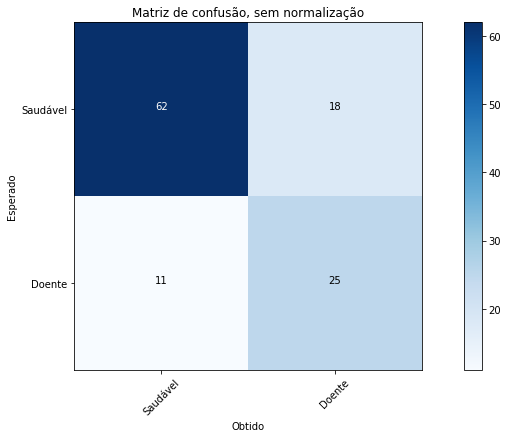

<Figure size 432x288 with 0 Axes>

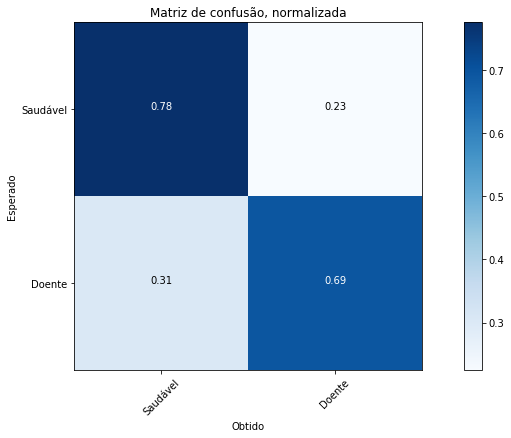

In [32]:
print(classification_report(yTeste,yPred, target_names=nomes))

cnf_matrix = confusion_matrix(yTeste, yPred)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=nomes,
                      title='Matriz de confusão, sem normalização')
# Normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=nomes, normalize=True,
                      title='Matriz de confusão, normalizada')

             precision    recall  f1-score   support

   Saudável       0.85      0.78      0.81        80
     Doente       0.58      0.69      0.63        36

avg / total       0.77      0.75      0.76       116



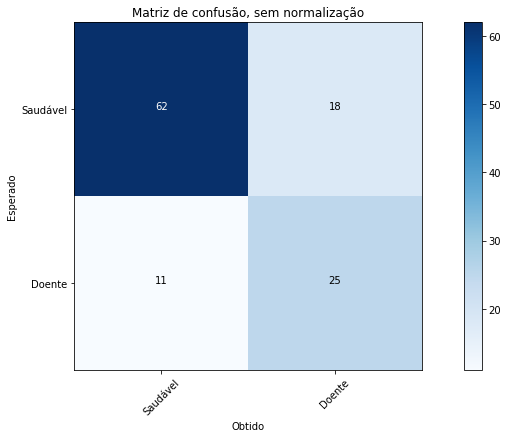

<Figure size 432x288 with 0 Axes>

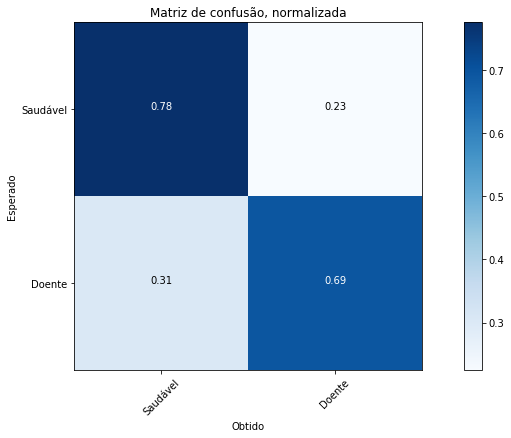

In [33]:
print(classification_report(yTeste,yPred, target_names=nomes))

cnf_matrix = confusion_matrix(yTeste, yPred)
np.set_printoptions(precision=2)
plot_confusion_matrix(cnf_matrix, classes=nomes,
                      title='Matriz de confusão, sem normalização')
# Normalizada
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=nomes, normalize=True,
                      title='Matriz de confusão, normalizada')